# Dorna Vision Tutorial

This tutorial guides you through setting up and running the Dorna Vision application using a Jupyter Notebook. The provided code can be executed as is, and you can customize its parameters to suit your specific application.

## Step 1: Open a Jupyter Notebook

Start by opening a Jupyter Notebook instance and create a new file.

## Step 2: Run the Dorna Vision Application

Add the following three lines of code to your Jupyter Notebook to start the Dorna Vision application:

```python
%matplotlib widget
from dorna_vision import App
App.run()
```
## Step 3: 
Visual adjustment: 
    Region of interest: Use this function to select a region in your image, that you are interested in to run all your vision algorithm. A region selector is provided, by clicking on the imgae and adding new points, you can end adding new points to your region by clicking on the first point created, remove the selected image, by pressing Esc, once the points are added, you can drag each to modify the region. Appl the ROI checkbox is there to enable and disable the ROI. Invert the Invert the roi is to set the ROI region.
    
    dorna_vision
        detection alforithm
        Camera module
        App - run
        Detect("path to the config")
        
        
        
    
    


In [1]:
%matplotlib widget

In [6]:
from ipywidgets import interactive, widgets
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from matplotlib.widgets import PolygonSelector
import ast
from camera import Camera
import pickle as pkl

from dorna_vision.draw import *
from dorna_vision.util import *
from dorna_vision.detect import *

class default_widget(object):
    """docstring for ClassName"""
    def __init__(self,):
        super(default_widget, self).__init__()
        continuous_update = False
        self.widget_input = {
            "poi_value": widgets.Text(value="[]", placeholder='[]', description='POI', disabled=True, layout={'width': '99%'}),

            "color_enb": widgets.Checkbox(value=False, description='Apply the color mask', continuous_update=continuous_update),
            "color_h": widgets.IntRangeSlider(value=[60, 120], min=0, max=179, step=1, description='Hue', continuous_update=continuous_update, layout={'width': '99%'}),
            "color_s": widgets.IntRangeSlider(value=[85, 170], min=0, max=255, step=1, description='Saturation', continuous_update=continuous_update, layout={'width': '99%'}),
            "color_v": widgets.IntRangeSlider(value=[85, 170], min=0, max=255, step=1, description='Vue', continuous_update=continuous_update, layout={'width': '99%'}),
            "color_inv": widgets.Checkbox(value=False, description='Invert the mask', continuous_update=continuous_update),

            "roi_enb": widgets.Checkbox(value=False, description='Apply the ROI', continuous_update=continuous_update),
            "roi_value": widgets.Text(value='[]', placeholder='[]', description='ROI', disabled=True, layout={'width': '99%'}),
            "roi_inv": widgets.Checkbox(value=False, description='Invert the region', continuous_update=continuous_update),
            
            "intensity_enb": widgets.Checkbox(value=False, description='Apply the intensity', continuous_update=continuous_update),
            "intensity_alpha" : widgets.FloatSlider(value=2, min=0, max=4, step=0.01, description='Contrast', continuous_update=continuous_update, layout={'width': '99%'}),
            "intensity_beta" : widgets.IntSlider(value=50, min=0, max=255, step=1, description='Brightness', continuous_update=continuous_update, layout={'width': '99%'}),
            
            "method_value": widgets.Dropdown(value=0, options=[('Ellipse detection', 0), ('Polygon detection', 2), ('Contour detection', 3), ('Aruco detection', 4)], description='Method', continuous_update=continuous_update),
    
            "m_elp_pf_mode": widgets.Checkbox(value=False, description='Auto detection', continuous_update=continuous_update),
            "m_elp_nfa_validation": widgets.Checkbox(value=True, description='False alarm validation', continuous_update=continuous_update),
            "m_elp_min_path_length": widgets.IntSlider(value=50, min=1, max=1000, step=1, description='Min path length', continuous_update=continuous_update, layout={'width': '99%'}),
            "m_elp_min_line_length": widgets.IntSlider(value=10, min=1, max=1000, step=1, description='Min line length', continuous_update=continuous_update, layout={'width': '99%'}),
            "m_elp_sigma": widgets.IntSlider(value=1, min=0, max=20, step=0.1, description='Blur', continuous_update=continuous_update, layout={'width': '99%'}),
            "m_elp_gradient_threshold_value": widgets.IntSlider(value=20, min=1, max=100, step=1, description='Gradient', continuous_update=continuous_update, layout={'width': '99%'}),
            "m_elp_axes": widgets.IntRangeSlider(value=[20, 100], min=1, max=1000, step=1, description='Axes range', continuous_update=continuous_update, layout={'width': '99%'}),
            "m_elp_ratio": widgets.FloatRangeSlider(value=[0, 1], min=0, max=1, step=0.01, description='Axes ratio', continuous_update=continuous_update, layout={'width': '99%'}),

            
            "m_circle_inv": widgets.Checkbox(value=True, description='Inverse', continuous_update=continuous_update),
            "m_circle_type": widgets.Dropdown(value=0, options=[('0: Otsu (auto)', 0), ('1: Binary', 1), ('2: Gaussian', 2)], description='Type', continuous_update=continuous_update),
            "m_circle_thr" : widgets.IntSlider(value=127, min=0, max=255, step=1, description='Threshold value', continuous_update=continuous_update, layout={'width': '99%'}),
            "m_circle_blur": widgets.IntSlider(value=3, min=1, max=20, step=1, description='Smoothing blur', continuous_update=continuous_update, layout={'width': '99%'}),                    
            "m_circle_mean_sub": widgets.IntSlider(value=0, min=-200, max=200, step=1, description='Mean subtract', continuous_update=continuous_update, layout={'width': '99%'}),
            "m_circle_radius": widgets.IntRangeSlider(value=[1, 30], min=0, max=100, step=1, description='Radius', continuous_update=continuous_update, layout={'width': '99%'}),
    

            "m_poly_inv": widgets.Checkbox(value=True, description='Inverse', continuous_update=continuous_update),
            "m_poly_type": widgets.Dropdown(value=0, options=[('0: Otsu (auto)', 0), ('1: Binary', 1), ('2: Gaussian', 2)], description='Type', continuous_update=continuous_update),
            "m_poly_thr" : widgets.IntSlider(value=127, min=0, max=255, step=1, description='Threshold value', continuous_update=continuous_update, layout={'width': '99%'}),
            "m_poly_blur": widgets.IntSlider(value=3, min=1, max=20, step=1, description='Smoothing blur', continuous_update=continuous_update, layout={'width': '99%'}),                    
            "m_poly_mean_sub": widgets.IntSlider(value=0, min=-200, max=200, step=1, description='Mean subtract', continuous_update=continuous_update, layout={'width': '99%'}),
            "m_poly_value" : widgets.IntSlider(value=3, min=3, max=20, step=1, description='Sides', continuous_update=continuous_update, layout={'width': '99%'}),
            "m_poly_area": widgets.IntRangeSlider(value=[100, 1000000], min=1, max=100000, step=100, description='Area', continuous_update=continuous_update, layout={'width': '99%'}),
            "m_poly_perimeter": widgets.IntRangeSlider(value=[10, 100000], min=1, max=100000, step=100, description='Perimeter', continuous_update=continuous_update, layout={'width': '99%'}),

            
            "m_cnt_inv": widgets.Checkbox(value=True, description='Inverse', continuous_update=continuous_update),
            "m_cnt_type": widgets.Dropdown(value=0, options=[('0: Otsu (auto)', 0), ('1: Binary', 1), ('2: Gaussian', 2)], description='Type', continuous_update=continuous_update),
            "m_cnt_thr" : widgets.IntSlider(value=127, min=0, max=255, step=1, description='Threshold value', continuous_update=continuous_update, layout={'width': '99%'}),
            "m_cnt_blur": widgets.IntSlider(value=3, min=1, max=20, step=1, description='Smoothing blur', continuous_update=continuous_update, layout={'width': '99%'}),                    
            "m_cnt_mean_sub": widgets.IntSlider(value=0, min=-200, max=200, step=1, description='Mean subtract', continuous_update=continuous_update, layout={'width': '99%'}),
            "m_cnt_area": widgets.IntRangeSlider(value=[100, 100000], min=1, max=100000, step=100, description='Area', continuous_update=continuous_update, layout={'width': '99%'}),
            "m_cnt_perimeter": widgets.IntRangeSlider(value=[10, 100000], min=1, max=100000, step=100, description='Perimeter', continuous_update=continuous_update, layout={'width': '99%'}),            

            "m_aruco_dictionary":widgets.Dropdown(value="DICT_6X6_250", options= ["DICT_4X4_50", "DICT_4X4_100", "DICT_4X4_250", "DICT_4X4_1000", "DICT_5X5_50", "DICT_5X5_100", "DICT_5X5_250", "DICT_5X5_1000", "DICT_6X6_50", "DICT_6X6_100", "DICT_6X6_250", "DICT_6X6_1000", "DICT_7X7_50", "DICT_7X7_100", "DICT_7X7_250", "DICT_7X7_1000", "DICT_ARUCO_ORIGINAL", "DICT_APRILTAG_16h5", "DICT_APRILTAG_25h9", "DICT_APRILTAG_36h10", "DICT_APRILTAG_36h11"], description='Dictionary', continuous_update=continuous_update),
            "m_aruco_marker_length": widgets.IntSlider(value=10, min=1, max=100, step=1, description='Marker length', continuous_update=continuous_update, layout={'width': '99%'}),
            "m_aruco_refine":widgets.Dropdown(value="CORNER_REFINE_NONE", options=["CORNER_REFINE_NONE", "CORNER_REFINE_SUBPIX", "CORNER_REFINE_CONTOUR", "CORNER_REFINE_APRILTAG"], description='Refinement', continuous_update=continuous_update),
            "m_aruco_subpix": widgets.Checkbox(value=False, description='Sub pixel', continuous_update=continuous_update),            
        }
        self.widget_trigger = {
            "color_picker": widgets.ColorPicker(concise=False, description='Color picker', value='blue', disabled=False, style={'text_width': '0'}),
            "color_hsv": widgets.Text(value='Hue = 119, Saturation = 255, Value = 255', placeholder='', description='', disabled=True, layout={'width': '99%'}),            

            "source_value": widgets.Dropdown(value=0, options=[('Intel RealSense', 0), ('Image file', 1)], description='Source', continuous_update=continuous_update, layout={'display': '99%'}),
            "s_file_value": widgets.Text(value='', placeholder='Path to the file (*.jpg, *.jpeg, *.png, *.tiff, ...).Ex: test.jpg', description='File path', disabled=False, layout={'width': '99%'}),            
            "s_apply": widgets.Button( description='Capture', disabled=False, button_style="", tooltip='Capture'),
            "s_update": widgets.Button( description='', disabled=False, button_style="", tooltip='Update source list', icon='refresh', layout={'width': '50px'}),
            "s_save_path": widgets.Text(value='', placeholder='*.jpg', description='Save image as', disabled=False, layout={'width': '99%'}),            
            "s_save": widgets.Button( description='Save', disabled=False, button_style="", tooltip='Save as'),
            
            "out_prm": widgets.Textarea(value='', placeholder='', description='Configuration', disabled=True, layout={'width': '99%'}),
            "out_return": widgets.Textarea(value='', placeholder='', description='Return value', disabled=True, layout={'width': '99%'}),
            
            "close": widgets.Button( description='Terminate the app', disabled=False, button_style="danger", tooltip='Terminate the app'),

        }


class App(object):
    """docstring for App"""
    def __init__(self):
        super(App, self).__init__()
        self.retval ={}
        self.config = {}

    def close(self, b):
        self.d.close()
        self.d.camera.close()
        plt.close('all')


    def detect_pattern(self):        
        # camera
        camera_connect = False
        camera = Camera()
        try:
            camera.connect()
            camera_connect = True
        except:
            pass
        
        # detect
        self.d = Detect(camera)
        
        # capture the first 
        if camera_connect:
            self.d.update_camera_data()
        else:
            self.d.camera_data = {"depth_frame": None, "ir_frame": None, "color_frame": None, "depth_img": None, "ir_img": None, "color_img": np.zeros((10, 10, 3), dtype=np.uint8), "depth_int": None, "frames": None, "timestamp": 0}
    
        """out plot"""
        # close everything first
        plt.close('all')
        
        # Create an initial display with the original image
        fig, ax = plt.subplots(frameon=False)
        self.plt = {
            "out":{
                "fig": fig,
                "ax": ax,
                "img_plt": ax.imshow(cv.cvtColor(self.d.camera_data["color_img"], cv.COLOR_BGR2RGB))
        }}
        #self.plt["out"]["fig"].suptitle("Output image")
        self.plt["out"]["fig"].canvas.header_visible = False
        self.plt["out"]["fig"].tight_layout()
        
        
        """widgets"""
        # widget
        self.widget_in = default_widget().widget_input
        self.widget_tr = default_widget().widget_trigger
        
        """accordion for adjust the image"""
        # adjust_image
        color_picker_box = widgets.HBox([self.widget_tr[k] for k in [key for key in self.widget_tr.keys() if key.startswith('color_')]])
        acc_adjust_img = widgets.Accordion()
        acc_adjust_img.children = [
            widgets.VBox([self.widget_in[k] for k in [key for key in self.widget_in.keys() if key.startswith('roi_')]]),
            widgets.VBox([self.widget_in[k] for k in [key for key in self.widget_in.keys() if key.startswith('intensity_')]]),
            widgets.VBox([self.widget_in[k] for k in [key for key in self.widget_in.keys() if key.startswith('color_')]]+[widgets.HTML("<hr>")]+[color_picker_box]),
        ]

        for i, title in enumerate(['Region of interest', 'Intensity', 'Color mask']):
            acc_adjust_img.set_title(i, title)    

        """source vbox"""
        source_vbox = widgets.VBox([
            widgets.HBox([self.widget_tr[k] for k in [key for key in ["source_value", "s_file_value", "s_apply"]]]),
            widgets.VBox([widgets.HTML("<hr>")]),
            widgets.HBox([self.widget_tr[k] for k in [key for key in ["s_save_path","s_save"]]]),
            widgets.VBox([widgets.HTML("<hr>")]),
            widgets.HBox([self.widget_tr[k] for k in [key for key in ["close"]]]),
        ])

        """method vbox"""
        method_vbox = widgets.VBox([
            self.widget_in["method_value"],
            widgets.VBox([widgets.HTML("<hr>")]),
            widgets.VBox([self.widget_in[k] for k in [key for key in self.widget_in.keys() if key.startswith('m_elp_')]][0:6]),
            widgets.VBox([self.widget_in[k] for k in [key for key in self.widget_in.keys() if key.startswith('m_circle_')]][0:5]),
            widgets.VBox([self.widget_in[k] for k in [key for key in self.widget_in.keys() if key.startswith('m_poly_')]][0:5]),
            widgets.VBox([self.widget_in[k] for k in [key for key in self.widget_in.keys() if key.startswith('m_cnt_')]][0:5]),
            widgets.VBox([self.widget_in[k] for k in [key for key in self.widget_in.keys() if key.startswith('m_aruco_')]][0:2]),
            widgets.VBox([widgets.HTML("<hr>")]),
            widgets.VBox([self.widget_in[k] for k in [key for key in self.widget_in.keys() if key.startswith('m_elp_')]][6:]),
            widgets.VBox([self.widget_in[k] for k in [key for key in self.widget_in.keys() if key.startswith('m_circle_')]][5:]),
            widgets.VBox([self.widget_in[k] for k in [key for key in self.widget_in.keys() if key.startswith('m_poly_')]][5:]),
            widgets.VBox([self.widget_in[k] for k in [key for key in self.widget_in.keys() if key.startswith('m_cnt_')]][5:]),
            widgets.VBox([self.widget_in[k] for k in [key for key in self.widget_in.keys() if key.startswith('m_aruco_')]][2:]),

        ], layout={'width': '100%'})        
    
        """method plot"""
        method_plt = widgets.Output(layout={'width': '100%'})
        with method_plt:
            # init fig and ax
            fig, ax = plt.subplots(frameon=False)
            self.plt["method"] = {
                "fig": fig,
                "ax": ax,
                "img_plt": ax.imshow(self.d.camera_data["color_img"], cmap='gray')
            }
            self.plt["method"]["fig"].canvas.header_visible = False
            self.plt["method"]["fig"].tight_layout()
            self.plt["method"]["fig"].set_size_inches((4,3), forward=True)
            self.plt["method"]["img_plt"].set_visible(False)
            self.plt["out"]["ax"].axis('off')
            plt.show(self.plt["method"]["fig"])


        """POI"""
        # poi selector
        poi_plot = widgets.Output()
        with poi_plot:
            # init fig and ax
            fig, ax = self.poi_plt()
            self.plt["poi"] = {
                "fig": fig,
                "ax": ax
            }
            plt.show(self.plt["poi"]["fig"])  

        # init poi
        self.poi_value = poly_select(self.widget_in["poi_value"])

        # Initialize poi selector
        self.poi_selector = PolygonSelector(self.plt["poi"]["ax"], onselect=self.poi_value.onselect, useblit=True, props=dict(color='orange', linestyle='--'))
        poi_box = widgets.VBox([self.widget_in["poi_value"], poi_plot])

        """result"""
        result_vbox = widgets.VBox([self.widget_tr[k] for k in [key for key in self.widget_tr.keys() if key.startswith('out_')]])

        """tab"""
        tab = widgets.Tab()
        tab.children = [
            source_vbox,
            acc_adjust_img,
            widgets.HBox([method_vbox, method_plt]),
            poi_box,
            result_vbox,
        ]
        tab.set_title(0, 'Source')
        tab.set_title(1, 'visual adjustment')
        tab.set_title(2, 'Pattern detection')
        tab.set_title(3, '6D Pose')
        tab.set_title(4, 'Result')
        display(tab)

        """roi"""
        # init roi
        self.roi_value = poly_select(self.widget_in["roi_value"])

        # Initialize PolygonSelector
        self.roi_selector = PolygonSelector(self.plt["out"]["ax"], onselect=self.roi_value.onselect, useblit=True, props=dict(color='blue', linestyle='--'))

        # interactive for source
        interactive(self.hide_show_source, source_value=self.widget_tr["source_value"])

        # interactive color_picker
        self.widget_tr["color_picker"].observe(self.hex_to_hsv, names='value')
        
        # capture
        self.widget_tr["s_apply"].on_click(self.capture_camera_data)

        # capture
        self.widget_tr["s_update"].on_click(self.update_source_list)

        # save
        self.widget_tr["s_save"].on_click(self.save_as_source)

        # close
        self.widget_tr["close"].on_click(self.close)

        # Create an interactive plot with the slider
        interactive(self._detect_pattern, **self.widget_in)
        
        
    def hex_to_hsv(self, change):
        # Remove '#' if present
        hex_color = change['new'].lstrip('#')

        # Convert hex to RGB
        rgb_color = tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))

        # Normalize RGB values to the range [0, 1]
        normalized_rgb = tuple(value / 255.0 for value in rgb_color)

        # Convert RGB to HSV
        hsv_color = colorsys.rgb_to_hsv(*normalized_rgb)

        # Adjust HSV values to the common OpenCV conventions
        h = int(hsv_color[0] * 179)
        s = int(hsv_color[1] * 255)
        v = int(hsv_color[2] * 255)
        self.widget_tr["color_hsv"].value = f"Hue = {h}, Saturation = {s}, Value = {v}"

        # color
        self.widget_in["color_h"].value = [max(0, h-20), min(179, h+20)]
        self.widget_in["color_s"].value = [max(0, s-20), min(255, s+20)]
        self.widget_in["color_v"].value = [max(0, v-20), min(255, v+20)]


    
    def save_as_source(self, b):
        file_path = self.widget_tr["s_save_path"].value
        
        # opencv
        cv.imwrite(file_path, self.d.camera_data["color_img"])

        
    def open_pkl(self, file_path):
        with open(file_path, 'rb') as file:
            loaded_data = pkl.load(file)
        return loaded_data


    def capture_camera_data(self, b):
        if self.widget_tr["source_value"].value == 1: # read from file
            # file_path
            file_path = self.widget_tr["s_file_value"].value
            
            if file_path.endswith(".pkl"): # picle format
                # data
                self.d.camera_data = self.open_pkl(file_path)
            else:
                img = cv.imread(file_path)
                self.d.camera_data = {"depth_frame": None, "ir_frame": None, "color_frame": None, "depth_img": None, "ir_img": None, "color_img": img, "depth_int": None, "frames": None, "timestamp": 0}

        elif self.widget_tr["source_value"].value == 0: # d405
            # get the data from camera
            self.d.update_camera_data()

        # adjust the frame size
        self.plt["out"]["img_plt"].set_extent([0, self.d.camera_data["color_img"].shape[1], self.d.camera_data["color_img"].shape[0], 0])
        self.plt["method"]["img_plt"].set_extent([0, self.d.camera_data["color_img"].shape[1], self.d.camera_data["color_img"].shape[0], 0])

        # call update
        kwargs = {k:self.widget_in[k].value for k in self.widget_in.keys()}
        self._detect_pattern(**kwargs)     

    def update_source_list(self, b):
        all_device = self.d.camera.all_device()
        
        i = 0
        options = []
        for device in all_device:
            options.append((device["name"] +" (S/N: "+device["serial_number"], ")", i))
            i += 1
        options.append(('Image file', i))
        self.widget_tr["source_value"].options = options
        
    def hide_show_source(self, **kwargs):
        if kwargs["source_value"] == 1:
            self.widget_tr["s_file_value"].layout.display = "flex"
        elif kwargs["source_value"] == 0:
            self.widget_tr["s_file_value"].layout.display = "none"

            
    def poi_plt(self):
        # create
        fig, ax = plt.subplots(frameon=False)
        fig.suptitle("Select 3 points of interest")
        fig.canvas.header_visible = False
        fig.tight_layout()
        
        # Set the height and calculate the width based on the golden ratio
        height = 1.0
        width = 1.0

        # Draw the ellipse in magenta
        ellipse = Ellipse((0, 0), 2 * width, 2 * height, linewidth=1, edgecolor='#FF00FF', facecolor='none')
        ax.add_patch(ellipse)

        # Draw the minimum bounding box around the ellipse in magenta
        min_bounding_box = plt.Rectangle((-width, -height), 2 * width, 2 * height, linewidth=1, edgecolor='#FF00FF', facecolor='none', label='Oriented Bounding Box')
        ax.add_patch(min_bounding_box)

        # Draw major and minor axes
        major_axis = plt.Line2D([0, width], [0, 0], color='red', linestyle='dashed', linewidth=1, label='Major Axis')
        minor_axis = plt.Line2D([0, 0], [0, height], color='green', linestyle='dashed', linewidth=1, label='Minor Axis')
        ax.add_line(major_axis)
        ax.add_line(minor_axis)

        # Plot the center of the rectangle in blue
        ax.plot(0, 0, marker='o', markersize=6, color='blue', label='Center')

        # Set axis limits with x and y axes twice as large
        ax.set_xlim(-2 * width, 2 * width)
        ax.set_ylim(-2 * height, 2 * height)

        # Display the legend
        ax.legend()

        # Set aspect ratio
        ax.set_aspect(1/1.68)

        # invert y
        ax.invert_yaxis()

        # Display the plot
        return fig, ax


    def _detect_pattern(self, **kwargs):
        try:
            # adjust kwargs
            kwargs["roi_value"] = ast.literal_eval(kwargs["roi_value"])
            kwargs["poi_value"] = ast.literal_eval(kwargs["poi_value"])

            # run pattern detection
            timestamp, retval, adjust_img, thr_img, _ = self.d._pattern(self.d.camera, self.d.camera_data, **kwargs)


            """hide and show inputs"""
            show_key = [[key for key in self.widget_in.keys() if key.startswith(term)] for term in ["m_elp", "m_circle", "m_poly", "m_cnt", "m_aruco"]][kwargs["method_value"]]
            hide_key = [key for key in self.widget_in.keys() if key.startswith('m_') and key not in show_key] 
            for k in show_key:
                if self.widget_in[k].layout.display != "flex":
                    self.widget_in[k].layout.display = "flex"
            for k in hide_key:
                if self.widget_in[k].layout.display != "none":
                    self.widget_in[k].layout.display = "none"

            # display thr
            if kwargs["method_value"] in [0, 4]: # ellipse, aruco      
                # img
                self.plt["method"]["img_plt"].set_visible(False)
                self.plt["method"]["ax"].axis('off')


            elif kwargs["method_value"] in [1, 2, 3]: # polygon and contour
                # img
                self.plt["method"]["img_plt"].set_visible(True)
                self.plt["method"]["ax"].axis('on')
                self.plt["method"]["img_plt"].set_data(thr_img)


            # Update the existing plot
            self.plt["out"]["img_plt"].set_data(cv.cvtColor(adjust_img, cv.COLOR_BGR2RGB))

            # Redraw the plot
            self.plt["out"]["fig"].canvas.draw_idle()
            self.plt["method"]["fig"].canvas.draw_idle()

            # type retval
            json_str = json.dumps(retval)
            converted_retval = json.loads(json_str, parse_int=lambda x: int(x), parse_float=lambda x: float(x), parse_constant=lambda x: x, object_hook=lambda d: {k: 1 if v is True else 0 if v is False else v for k, v in d.items()}) 
            self.widget_tr["out_return"].value = json.dumps(converted_retval)
            self.retval = retval

            # parameters
            json_str = json.dumps(kwargs)
            converted_kwargs = json.loads(json_str, parse_int=lambda x: int(x), parse_float=lambda x: float(x), parse_constant=lambda x: x, object_hook=lambda d: {k: 1 if v is True else 0 if v is False else v for k, v in d.items()}) 
            self.widget_tr["out_prm"].value = json.dumps(converted_kwargs)
            self.config = kwargs
        except Exception as ex:
            print(ex)
            pass

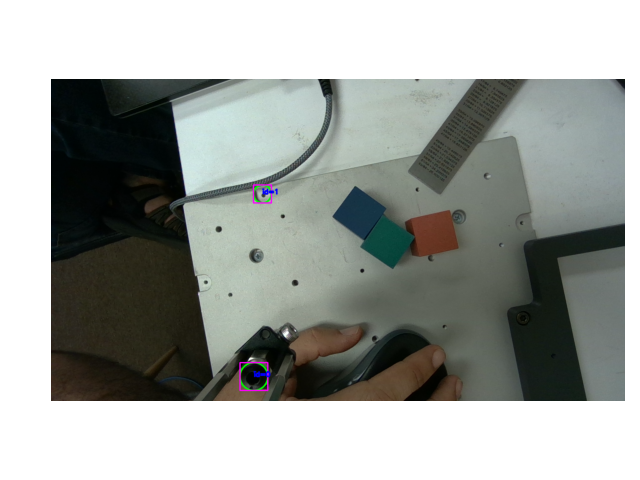

In [7]:
App().detect_pattern()